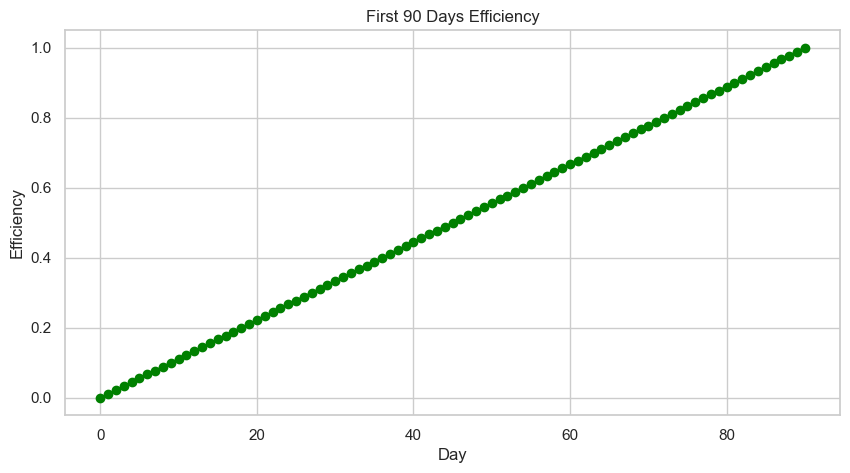

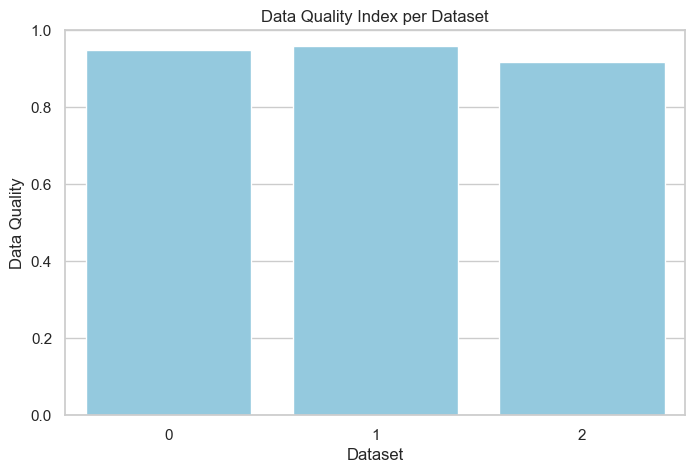

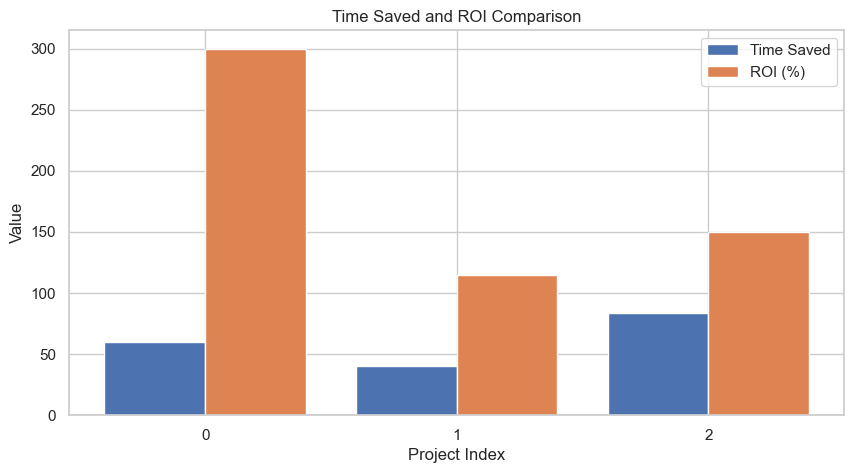

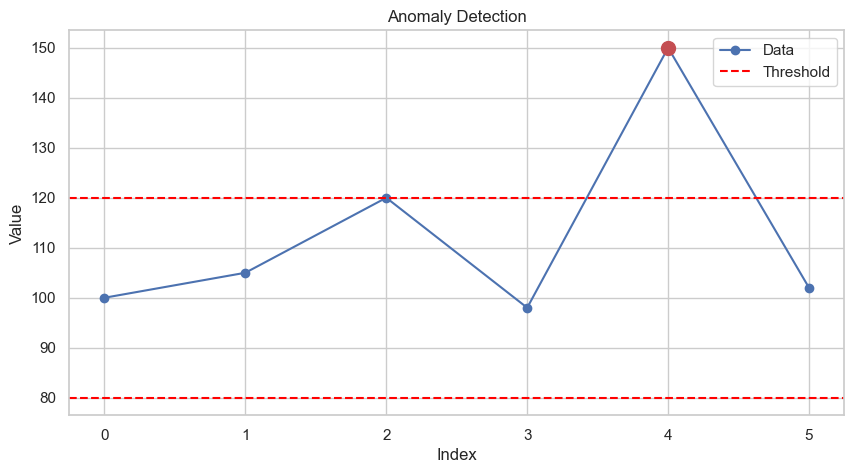

In [2]:
# Siemens Energy Digitalization Metrics Dashboard
# Developed Using Python by Heider Jeffer


import math
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Time Saved by Automation
def time_saved(T_manual: float, R: float) -> float:
    return T_manual * R

# 2) ROI (Return on Investment)
def roi(C_saved: float, C_project: float) -> float:
    return ((C_saved - C_project) / C_project) * 100

# 3) Data Quality Index
def data_quality(N_errors: int, N_total: int) -> float:
    if N_total == 0:
        return 0.0
    return 1 - (N_errors / N_total)

# 4) Anomaly Detection (Threshold Method)
def is_anomaly(x_i: float, mu: float, sigma: float, k: float) -> bool:
    return abs(x_i - mu) > k * sigma

# 5) System Optimization
def system_optimization(P: List[float], C: List[List[float]]) -> float:
    total = sum(P)
    for row in C:
        total += sum(row)
    return total

# 6) CIA Principles (Confidentiality, Integrity, Availability)
def secure_system_index(P_conf: float, P_integrity: float, P_avail: float) -> float:
    return P_conf * P_integrity * P_avail

# 7) KPI Aggregation
def kpi_index(weights: List[float], KPIs: List[float]) -> float:
    if sum(weights) == 0:
        return 0.0
    return sum(w * k for w, k in zip(weights, KPIs)) / sum(weights)

# 8) Automation Pipeline Success Probability
def pipeline_success(P_etl: float, P_rpa: float, P_report: float) -> float:
    return P_etl * P_rpa * P_report

# 9) First 90 Days Efficiency
def efficiency_over_time(t: int, E_max: float) -> float:
    if t < 0:
        return 0.0
    if t > 90:
        t = 90
    return E_max * (t / 90)

# 10) Scaling Factor
def total_improvement(N_sites: int, S_unit: float) -> float:
    return N_sites * S_unit


# --- Visualization Functions ---

def plot_efficiency(E_max=1.0):
    days = list(range(0, 91))
    efficiency = [efficiency_over_time(t, E_max) for t in days]
    plt.figure(figsize=(10,5))
    plt.plot(days, efficiency, marker='o', color='green')
    plt.title('First 90 Days Efficiency')
    plt.xlabel('Day')
    plt.ylabel('Efficiency')
    plt.grid(True)
    plt.show()

def plot_data_quality(errors_list, total_list):
    dq_values = [data_quality(e, t) for e, t in zip(errors_list, total_list)]
    plt.figure(figsize=(8,5))
    sns.barplot(x=list(range(len(dq_values))), y=dq_values, color='skyblue')  # Fixed Seaborn warning
    plt.title('Data Quality Index per Dataset')
    plt.xlabel('Dataset')
    plt.ylabel('Data Quality')
    plt.ylim(0,1)
    plt.show()

def plot_roi_time_saved(T_manual_list, R_list, C_saved_list, C_project_list):
    time_saved_values = [time_saved(t, r) for t, r in zip(T_manual_list, R_list)]
    roi_values = [roi(cs, cp) for cs, cp in zip(C_saved_list, C_project_list)]
    plt.figure(figsize=(10,5))
    plt.bar([i-0.2 for i in range(len(time_saved_values))], time_saved_values, width=0.4, label='Time Saved')
    plt.bar([i+0.2 for i in range(len(roi_values))], roi_values, width=0.4, label='ROI (%)')
    plt.xticks(range(len(time_saved_values)))
    plt.title('Time Saved and ROI Comparison')
    plt.xlabel('Project Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

def plot_anomalies(data, mu, sigma, k):
    anomalies = [x for x in data if is_anomaly(x, mu, sigma, k)]
    plt.figure(figsize=(10,5))
    plt.plot(data, 'bo-', label='Data')
    for i, x in enumerate(data):
        if x in anomalies:
            plt.plot(i, x, 'ro', markersize=10, label='Anomaly' if i==0 else "")
    plt.axhline(mu + k*sigma, color='red', linestyle='--', label='Threshold')
    plt.axhline(mu - k*sigma, color='red', linestyle='--')
    plt.title('Anomaly Detection')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# --- Example Visualizations ---
if __name__ == "__main__":
    plot_efficiency(E_max=1.0)
    plot_data_quality([5, 2, 10], [100, 50, 120])
    plot_roi_time_saved([100, 80, 120], [0.6, 0.5, 0.7], [20000,15000,25000], [5000,7000,10000])
    plot_anomalies([100, 105, 120, 98, 150, 102], mu=100, sigma=10, k=2)


## **Overview**

The notebook is a **comprehensive framework for business and operational metrics**, designed to support Siemens Energy’s **digitalization and automation initiatives**. It implements **10 key metrics**, calculates their values in Python, and provides **visualizations** to monitor trends, anomalies, and performance improvements.

---

## **Code Breakdown**

### **1) Time Saved by Automation**

```python
def time_saved(T_manual: float, R: float) -> float:
    return T_manual * R
```

* **Purpose:** Calculates the actual hours saved per employee or team when a process is automated.
* **Inputs:**

  * `T_manual`: Time currently spent manually.
  * `R`: Proportion of the process automated (0–1).
* **Output:** Time saved (hours).
* **Use case:** Shows how automation frees up time for higher-value work.

---

### **2) ROI (Return on Investment)**

```python
def roi(C_saved: float, C_project: float) -> float:
    return ((C_saved - C_project) / C_project) * 100
```

* **Purpose:** Measures financial effectiveness of a project.
* **Inputs:**

  * `C_saved`: Cost saved due to automation or optimization.
  * `C_project`: Cost of implementing the project.
* **Output:** ROI in %. Positive → profitable, negative → loss.
* **Use case:** Evaluates whether automation or digital initiatives are financially worthwhile.

---

### **3) Data Quality Index**

```python
def data_quality(N_errors: int, N_total: int) -> float:
    if N_total == 0: return 0.0
    return 1 - (N_errors / N_total)
```

* **Purpose:** Measures accuracy and reliability of datasets.
* **Output range:** 0 → all data has errors; 1 → perfect quality.
* **Use case:** Helps identify the reliability of operational data feeding digital systems.

---

### **4) Anomaly Detection (Threshold Method)**

```python
def is_anomaly(x_i: float, mu: float, sigma: float, k: float) -> bool:
    return abs(x_i - mu) > k * sigma
```

* **Purpose:** Detects abnormal data points.
* **Logic:** Any value `x_i` outside `k` standard deviations from the mean `mu` is flagged as an anomaly.
* **Use case:** Highlights production issues, errors, or unexpected behavior.

---

### **5) System Optimization**

```python
def system_optimization(P: List[float], C: List[List[float]]) -> float:
    total = sum(P)
    for row in C:
        total += sum(row)
    return total
```

* **Purpose:** Measures overall system performance.
* **Inputs:**

  * `P`: List of individual component performances.
  * `C`: Inter-component efficiencies (2D list).
* **Output:** Total system performance score.
* **Use case:** Quantifies efficiency gains from process or system improvements.

---

### **6) CIA Principles (Confidentiality, Integrity, Availability)**

```python
def secure_system_index(P_conf: float, P_integrity: float, P_avail: float) -> float:
    return P_conf * P_integrity * P_avail
```

* **Purpose:** Evaluates system security and reliability.
* **Output:** Index from 0–1, higher is better.
* **Use case:** Ensures digital systems remain secure, trustworthy, and available.

---

### **7) KPI Aggregation**

```python
def kpi_index(weights: List[float], KPIs: List[float]) -> float:
    if sum(weights) == 0: return 0.0
    return sum(w * k for w, k in zip(weights, KPIs)) / sum(weights)
```

* **Purpose:** Computes a weighted average of multiple KPIs.
* **Use case:** Creates a single, overall performance index from several metrics for dashboards or management reporting.

---

### **8) Automation Pipeline Success Probability**

```python
def pipeline_success(P_etl: float, P_rpa: float, P_report: float) -> float:
    return P_etl * P_rpa * P_report
```

* **Purpose:** Calculates the probability that an entire automated workflow succeeds.
* **Inputs:** Probabilities of each step (ETL, RPA, report).
* **Use case:** Supports confidence assessment in automation reliability.

---

### **9) First 90 Days Efficiency**

```python
def efficiency_over_time(t: int, E_max: float) -> float:
    if t < 0: return 0.0
    if t > 90: t = 90
    return E_max * (t / 90)
```

* **Purpose:** Models efficiency growth during the first 90 days of a project.
* **Use case:** Tracks operational impact over time for new processes.

---

### **10) Scaling Factor**

```python
def total_improvement(N_sites: int, S_unit: float) -> float:
    return N_sites * S_unit
```

* **Purpose:** Measures cumulative improvement when scaling a solution across multiple sites.
* **Use case:** Helps quantify organizational impact of digitalization initiatives.

---

## **Visualization Functions**

* **`plot_efficiency()`** → Line plot showing efficiency growth over 90 days.
* **`plot_data_quality()`** → Bar chart comparing data quality across datasets.
* **`plot_roi_time_saved()`** → Side-by-side bar chart for time saved vs ROI across projects.
* **`plot_anomalies()`** → Plots data points and highlights anomalies exceeding threshold.

---

## **Key Features & Use Cases**

1. **Decision Support:** Quantifies efficiency, ROI, and system performance to support strategic decisions.
2. **Automation Monitoring:** Tracks RPA, ETL, and reporting pipeline success probabilities.
3. **Data Reliability:** Highlights errors and anomalies for proactive corrections.
4. **Visualization:** Provides intuitive charts for dashboards or presentations.
5. **Scalability:** Can model improvements across multiple sites and track 90-day operational impact.

---
